# Python Data Visualization
Data download:
https://figshare.com/ndownloader/articles/1314459/versions/10


Adapted from Data Carpentry's material:
https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python.html

[Accompanying Slides](https://docs.google.com/presentation/d/1Iy72RxX-J7O5kg-odqqzOw1DijCPijP9yoHmWCkvaeQ/edit?usp=drive_link)

In [1]:
import plotnine as p9 # Visualization Library
import pandas as pd

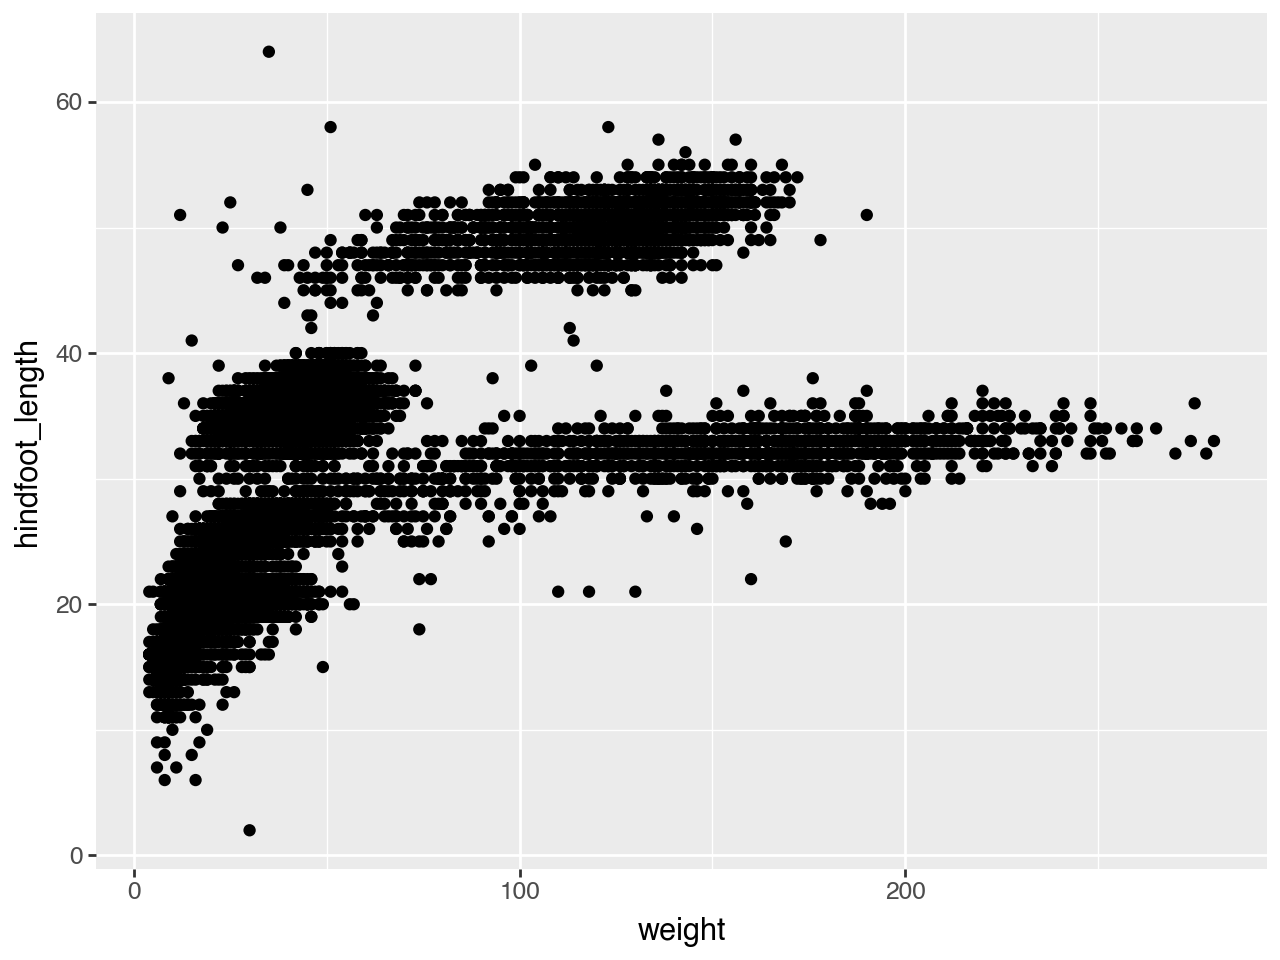

In [3]:
# Create a graph step-by-step
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

# plot the weight compared to the hindfood_length
surveys_plot = p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight',
y='hindfoot_length'))
surveys_plot + p9.geom_point() # creates the plot

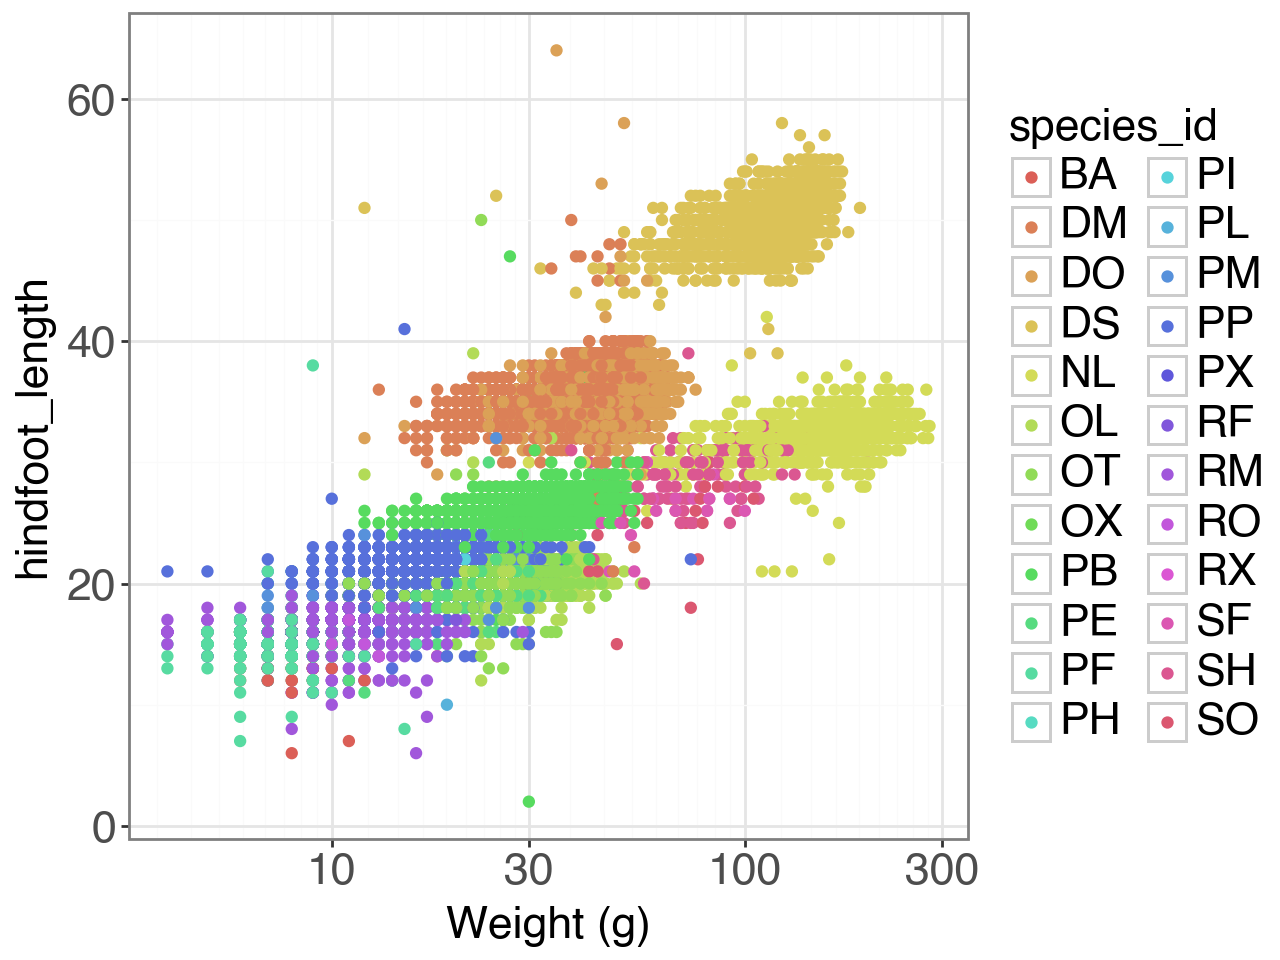

In [5]:
# Use brackets and the '+' operator for adding elements to your plot
surveys_plot = p9.ggplot(data=surveys_complete,
mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
(surveys_plot
+ p9.geom_point()
+ p9.xlab("Weight (g)")
+ p9.scale_x_log10()
+ p9.theme_bw()
+ p9.theme(text=p9.element_text(size=16)))

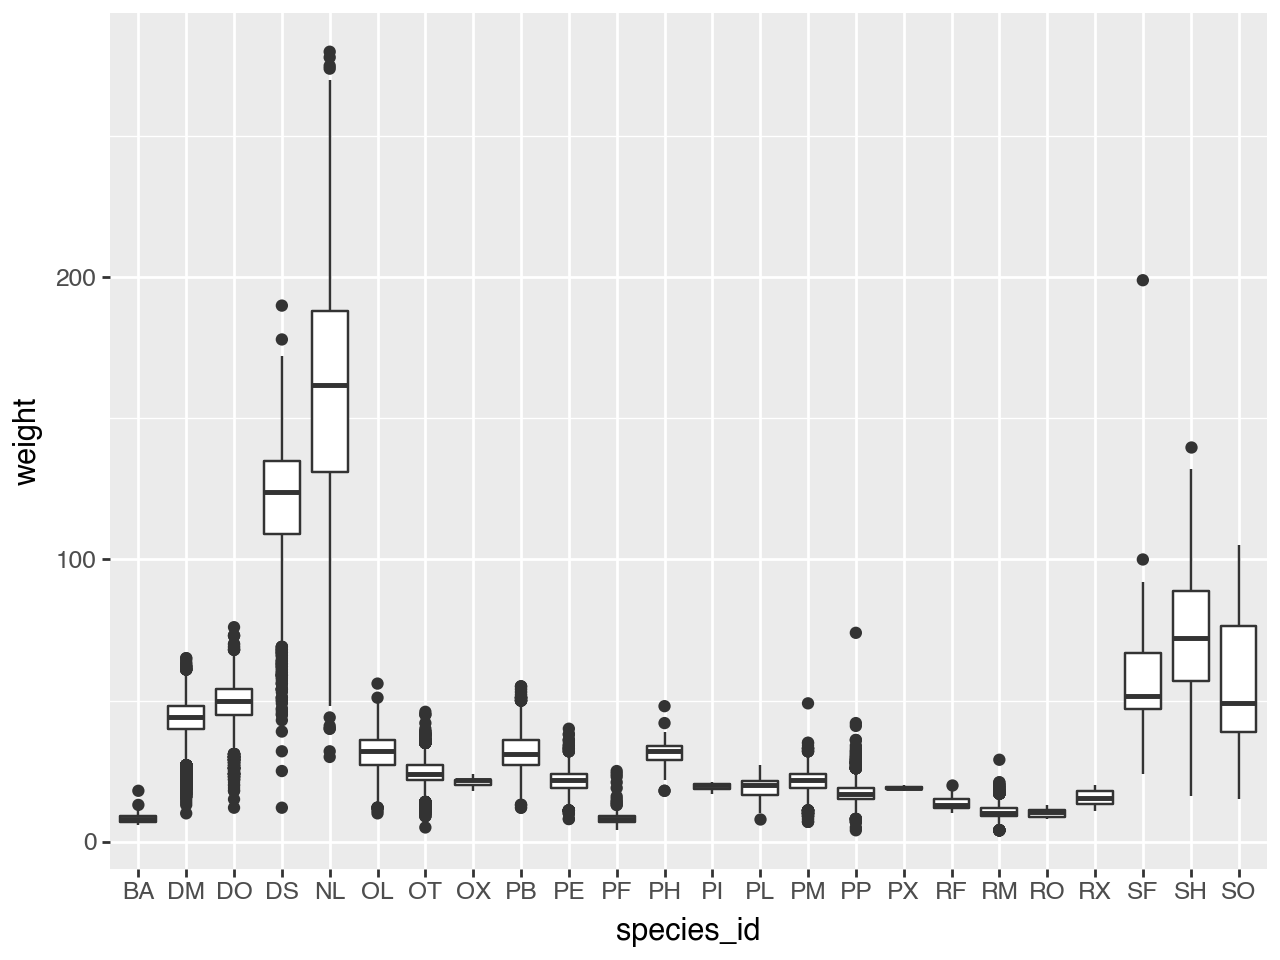

In [7]:
# boxplot
# visualize the distribution of weight within each species_id
surveys_plot = p9.ggplot(data=surveys_complete,
mapping=p9.aes(x='species_id', y='weight'))
surveys_plot + p9.geom_boxplot()

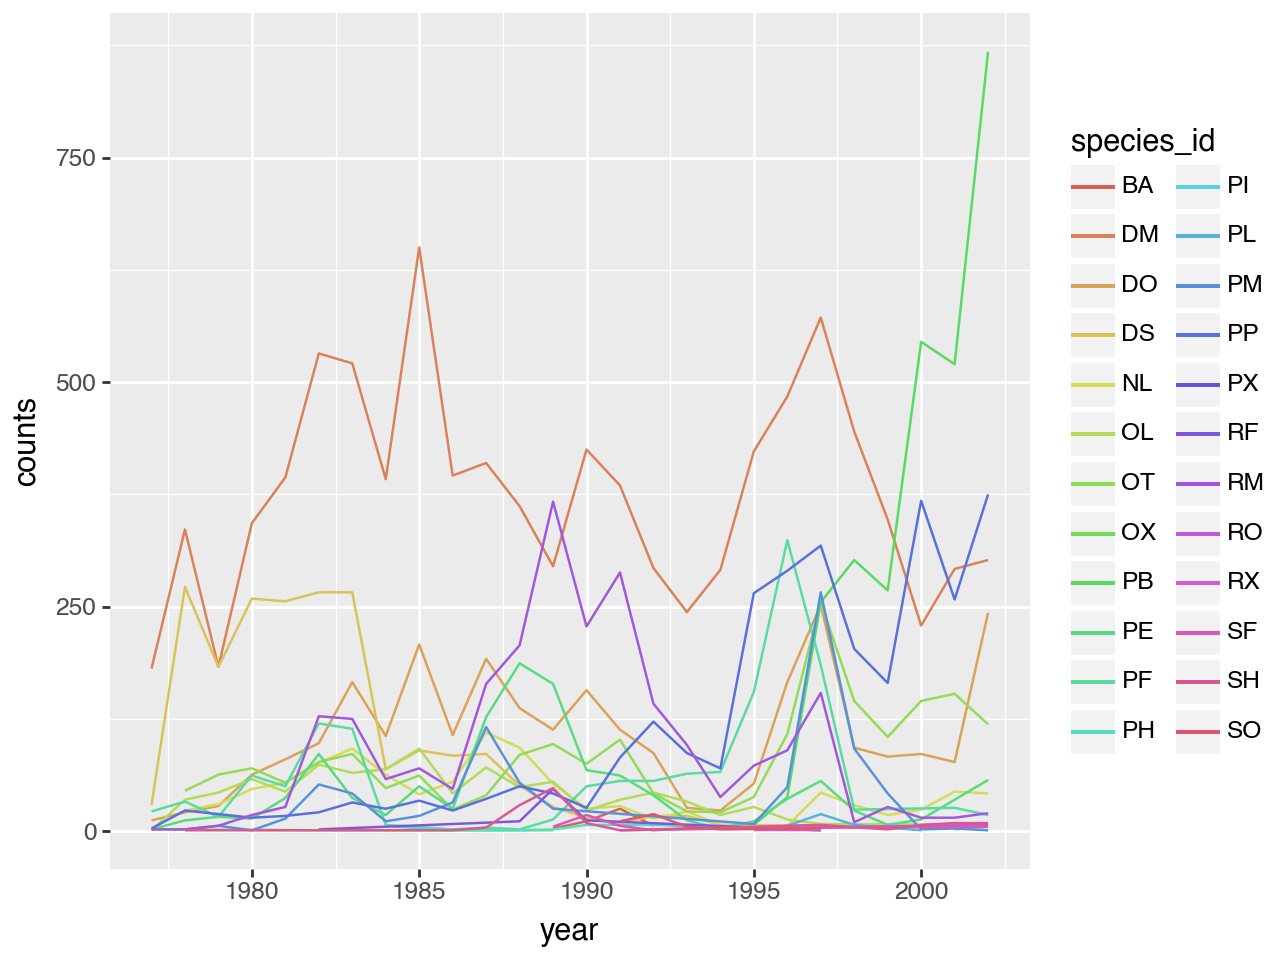

In [11]:
# Time series line chart
#calculate number of counts per year for each species
yearly_counts = surveys_complete.groupby(['year',
'species_id'])['species_id'].count()
yearly_counts = yearly_counts.reset_index(name='counts')
# converts Series to Dataframe
surveys_plot = p9.ggplot(data=yearly_counts, mapping=p9.aes(x='year',
y='counts', color='species_id'))
surveys_plot + p9.geom_line()

### Adapt the boxplot from the previous exercise and create a bar chart
* mapping the 'sex' variable to the color fill
* Change the scale of the color fill by providing the colors blue and orange
manually (see [API](https://plotnine.org/reference/) reference to find the appropriate function).

## Split plots

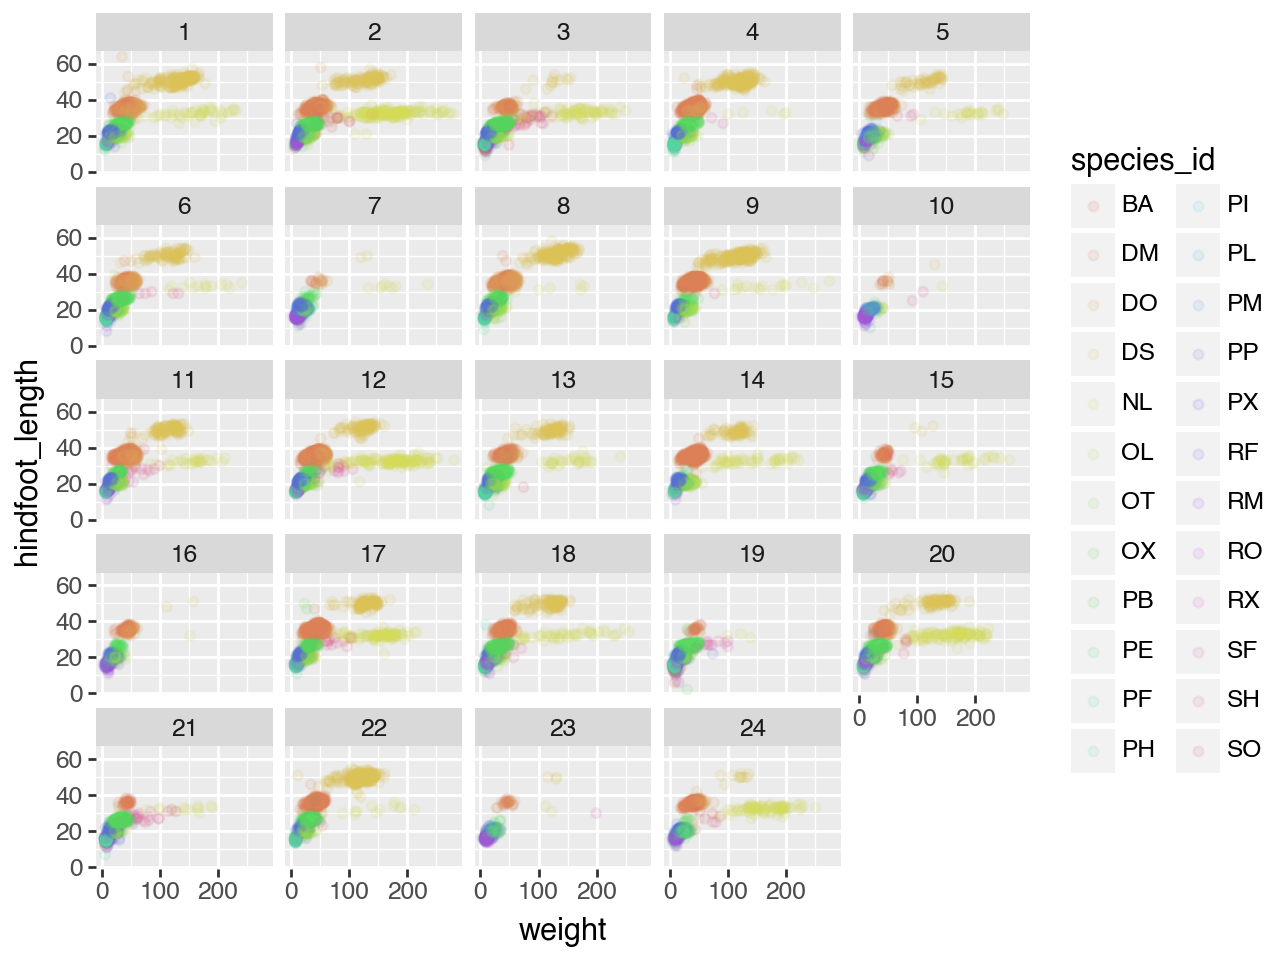

In [13]:
# 'facet_wrap' extracts plots into an arbitrary number of dimensions to allow them to cleanly fit on one page

# plot the weight compared to the hindfood_length for each location
surveys_plot = p9.ggplot(data=surveys_complete,
mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
surveys_plot + p9.geom_point(alpha=0.1) + p9.facet_wrap("plot_id")

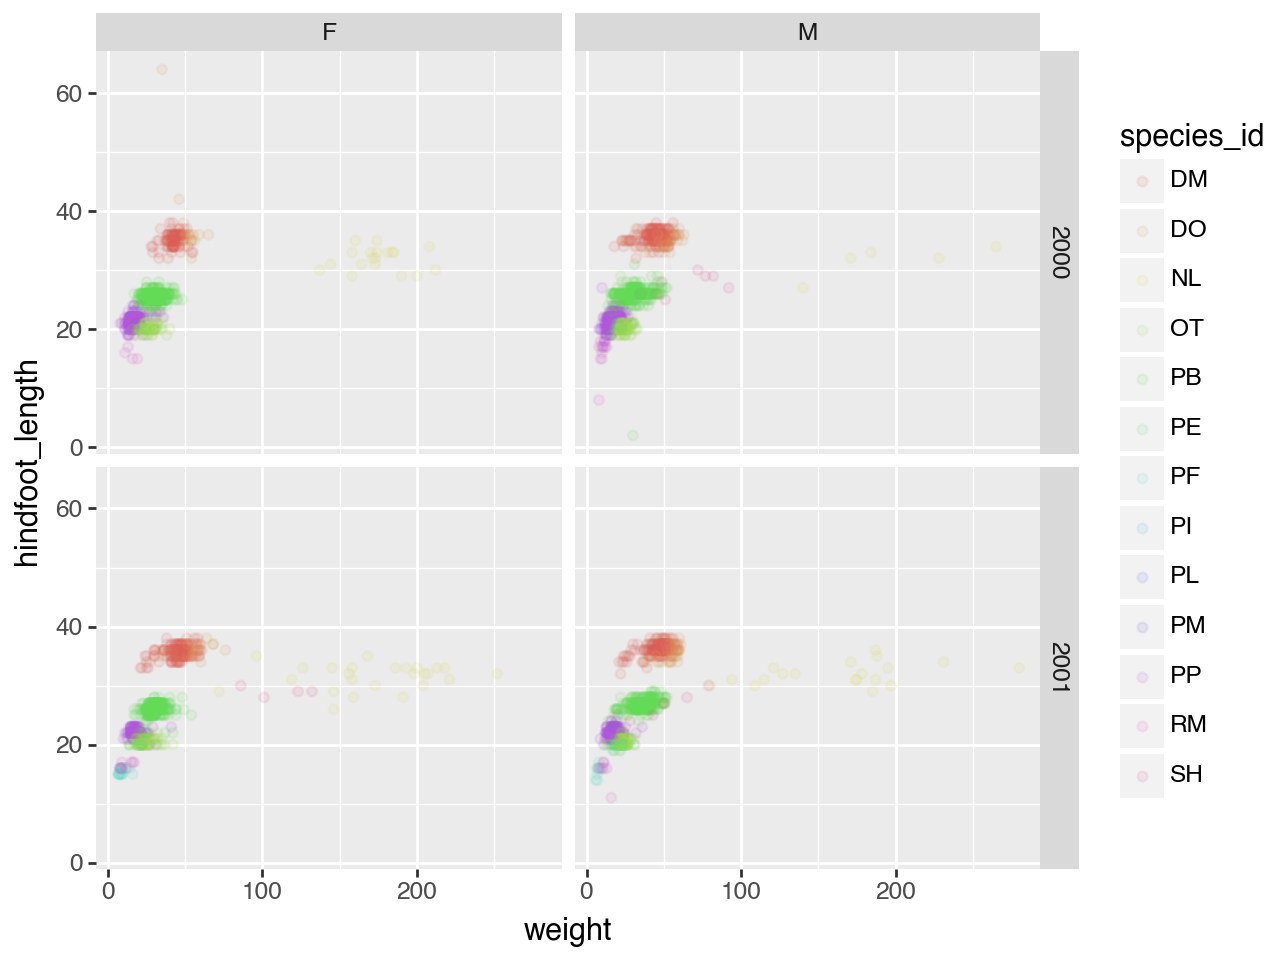

In [14]:
# To specify how you want your plots to be arranged uses formula notation (rows ~ columns)
# A '.' can be used as a placeholder that indicates only one row or column) e.g "year ~ ."

# select years 2001 and 2002 and plot weight vs hindfoot_length separated by year and sex
survey_2000_2001 =surveys_complete[surveys_complete["year"].isin([2000, 2001])]
surveys_plot = p9.ggplot(data=survey_2000_2001,
mapping=p9.aes(x='weight', y='hindfoot_length',
color='species_id'))
surveys_plot + p9.geom_point(alpha=0.1) + p9.facet_grid("year ~ sex")

### Further Vizualization Customizations

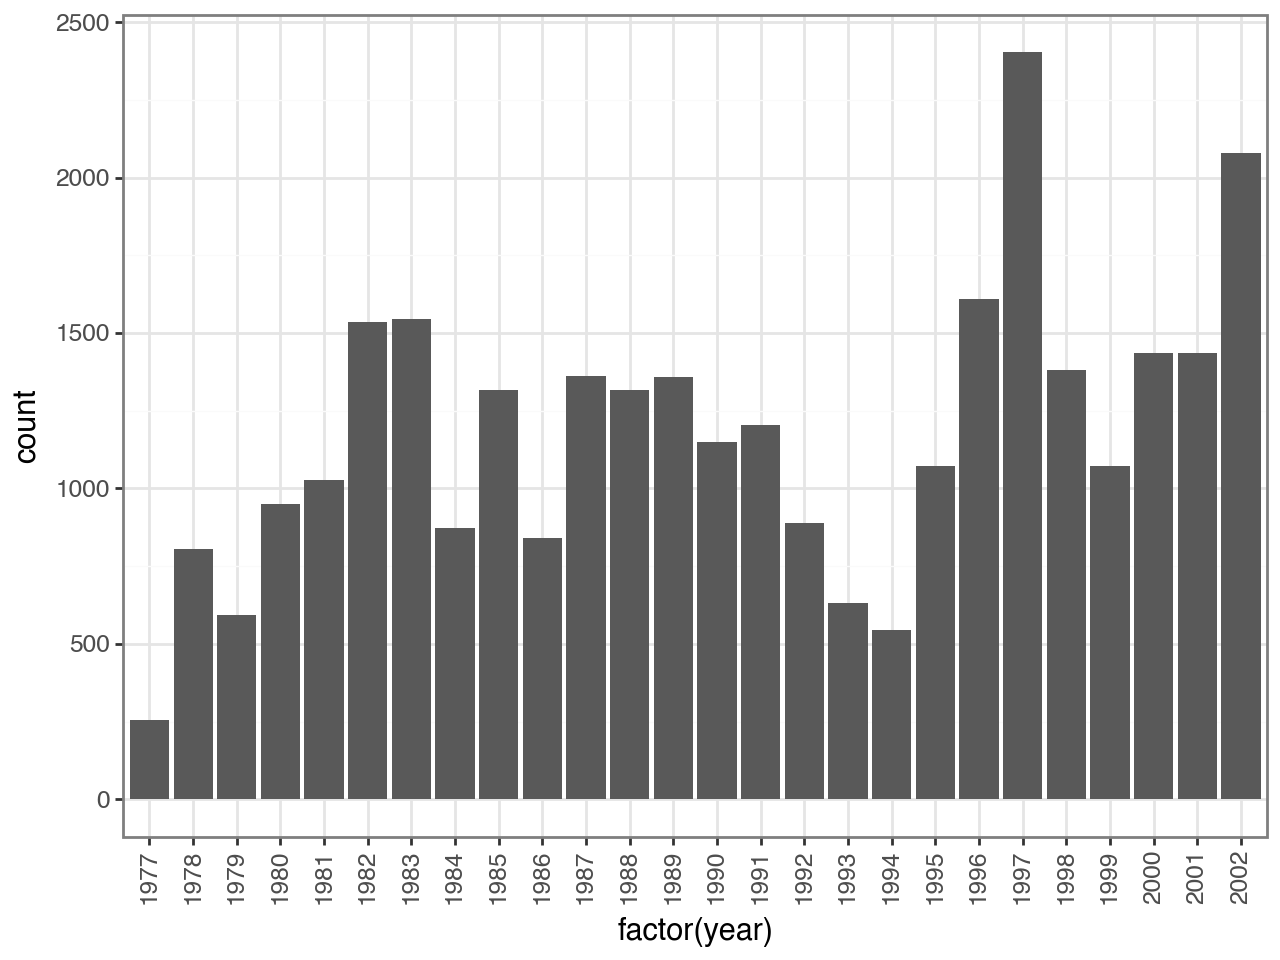

In [19]:
# Change text angle
surveys_plot = p9.ggplot(data=surveys_complete,
mapping=p9.aes(x='factor(year)'))
surveys_plot + p9.geom_bar()
surveys_plot + p9.geom_bar() + p9.theme_bw() + p9.theme(axis_text_x = p9.element_text(angle=90))

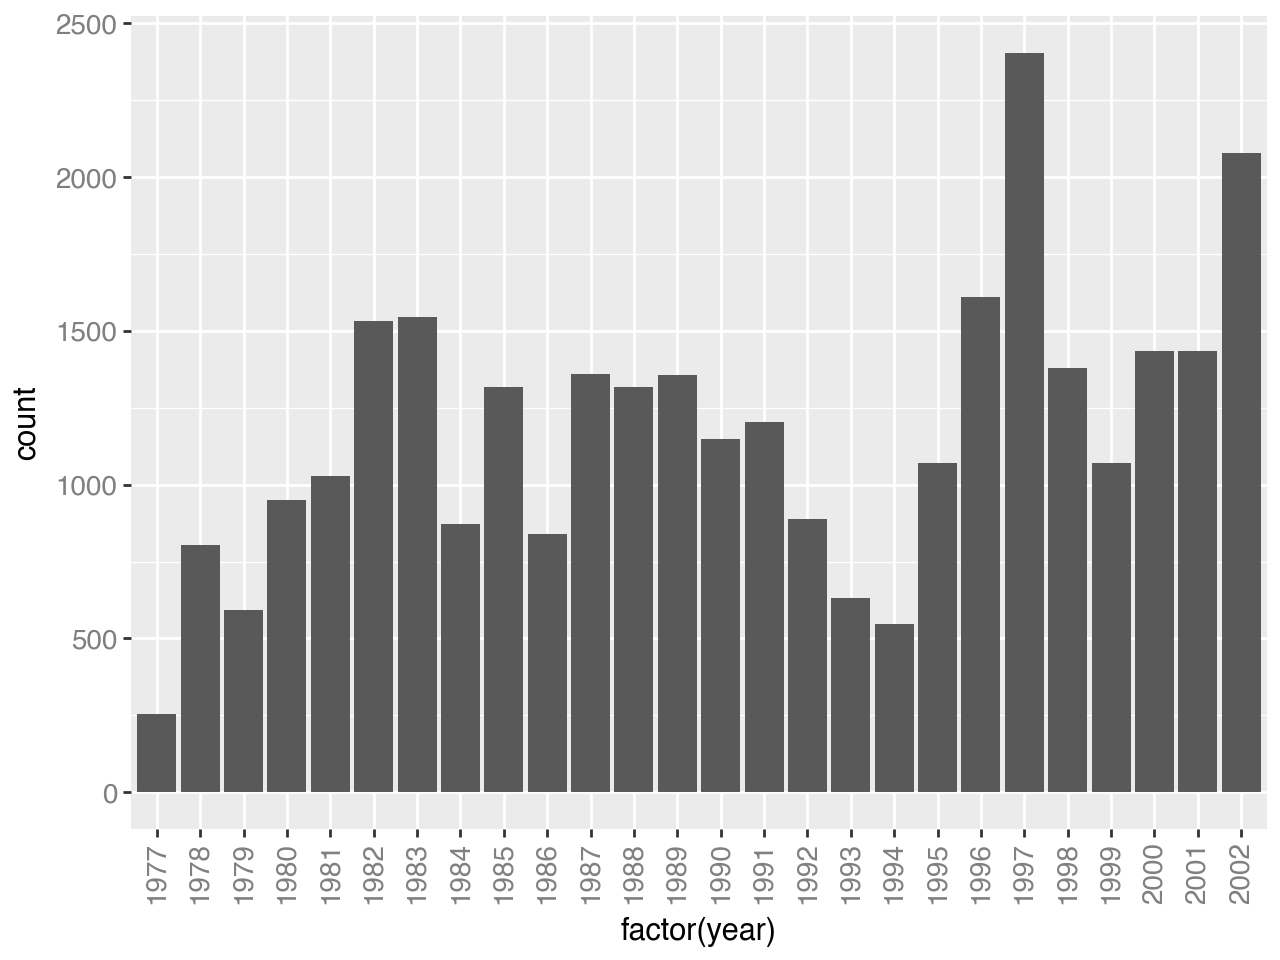

In [21]:
# Use a custom theme and categorical variable with 'factor' function
my_custom_theme = p9.theme(axis_text_x = p9.element_text(color="grey", size=10, angle=90, hjust=.5), axis_text_y = p9.element_text(color="grey", size=10))
surveys_plot = p9.ggplot(data=surveys_complete,mapping=p9.aes(x='factor(year)'))
surveys_plot + p9.geom_bar() + my_custom_theme

In [23]:
# Saving plots
my_plot = (p9.ggplot(data=surveys_complete, mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id')) + p9.geom_point())
my_plot.save("my_bar_graph.png", width=10, height=10, dpi=300) 

/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 10 x 10 in image.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: my_bar_graph.png


## matplotlib

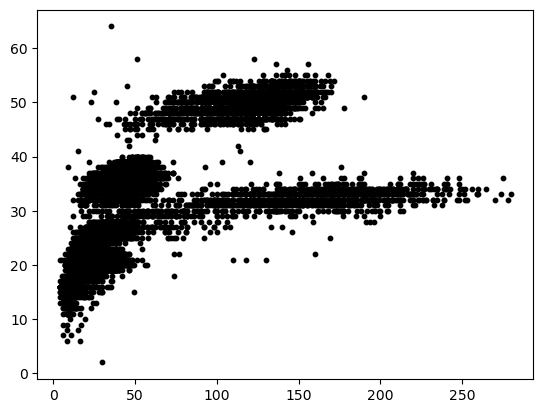

In [17]:
import matplotlib.pyplot as plt
import pandas as pd


surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()


x = surveys_complete.weight
y = surveys_complete.hindfoot_length
surveys_plot_plt = plt.scatter(x, y, s =10, c='black')
plt.show()


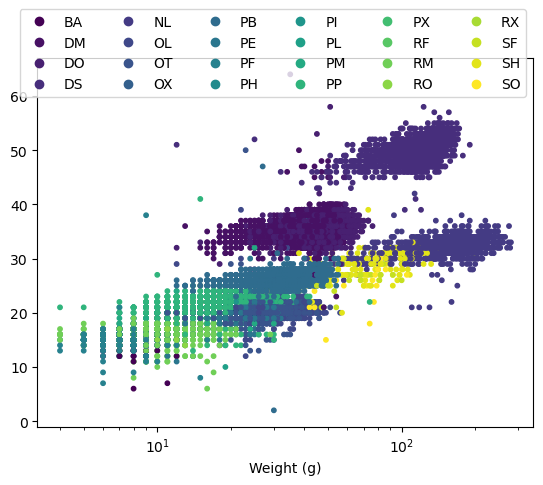

In [25]:
# Category-wise coloring
import numpy as np
labels, index = np.unique(surveys_complete.species_id, return_inverse=True)
# Now we apply the indices to the data points:
surveys_plot_plt = plt.scatter(x, y, s =10, c=index)
#You can let the legend() function to handle the coloring and specify where you want the legend to appear, and appearance of the legend box:
plt.legend(surveys_plot_plt.legend_elements(num=None)[0], labels, ncol=6, loc='upper left', bbox_to_anchor=(-0.05, 1.15))
#Add other aspects such as x-label title, applying log scale to x-axis etc.
plt.xlabel("Weight (g)")
plt.xscale("log")
plt.show()


/var/folders/kb/87shxy6d2w9_dvhnrw80k6jc0000gn/T/ipykernel_74631/641513747.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


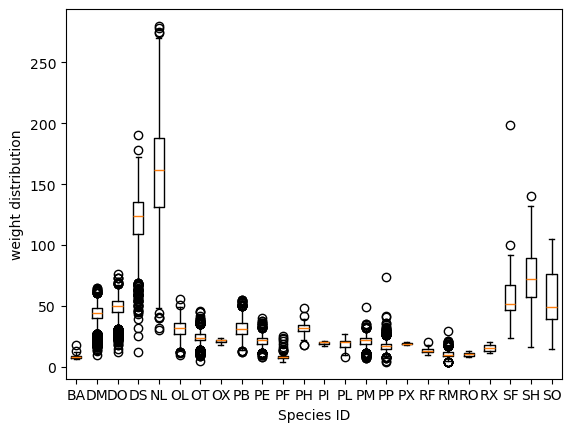

In [27]:
# Boxplots with matplotlib
data=[]
labels=[]
for element in np.unique(surveys_complete.species_id):
   data.append(surveys_complete.loc[surveys_complete['species_id'] == element, 'weight'].to_numpy())
   labels.append(element)
   
plt.boxplot(data, labels=labels)#additional arguments can be provided to control whisker and box width, marker size, shape, color, opacity etc.
plt.xlabel("Species ID")
plt.ylabel("weight distribution")


plt.show()
